In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Data Preprocessing


In [31]:
df.shape

(10999, 12)

In [32]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [33]:
df.drop(['ID'],axis=1,inplace=True)

In [34]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [35]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [36]:
df.duplicated().sum()

np.int64(0)

## Descriptive Statistics

In [37]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## Exploratory Data Analysis

Text(0.5, 1.0, 'Gender Description')

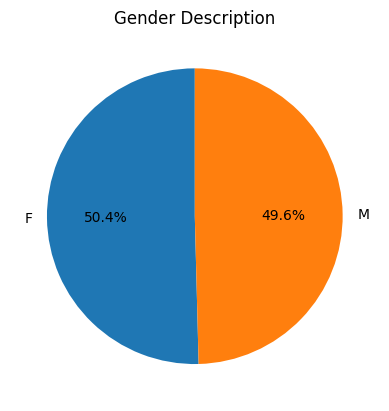

In [38]:
plt.pie(df['Gender'].value_counts(), labels=['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Description')

## Product Properties

Text(0.5, 1.0, 'Cost of the Product')

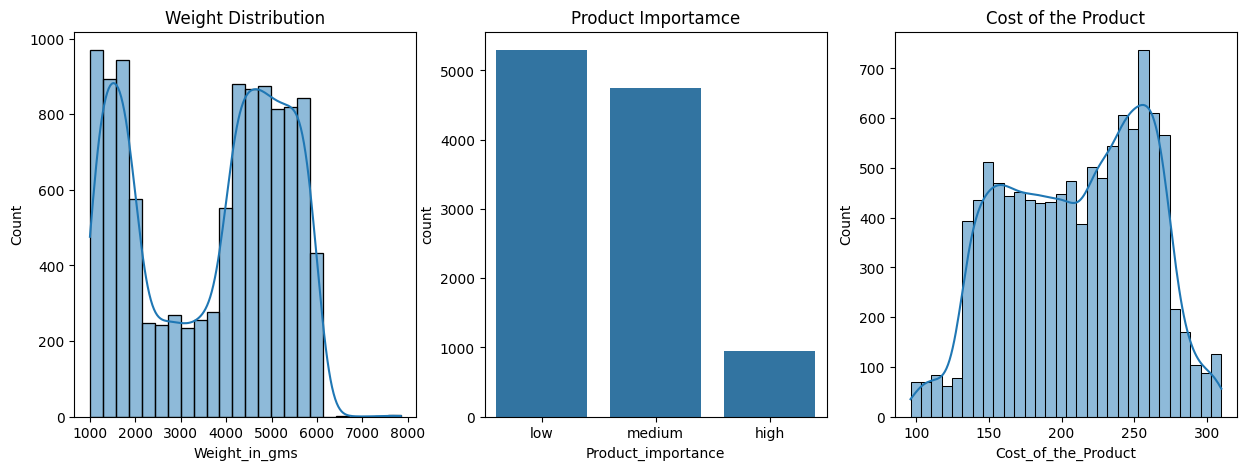

In [39]:
fig, ax =plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x='Product_importance', data =df, ax=ax[1]).set_title('Product Importamce')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

## Logistics

Text(0.5, 1.0, 'Reached on Time')

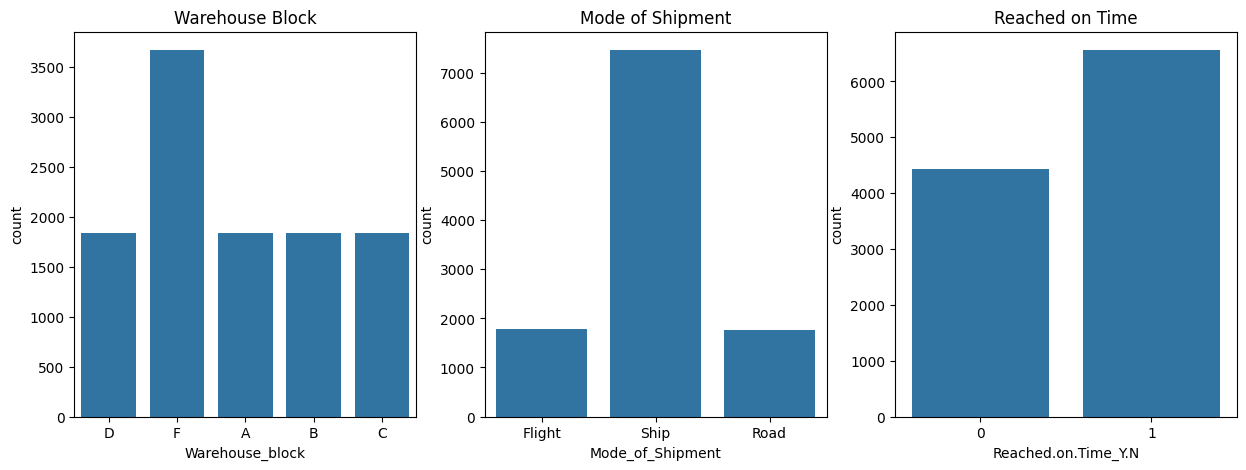

In [40]:
fig, ax=plt.subplots(1,3,figsize = (15,5))
sns.countplot(x='Warehouse_block',data=df, ax=ax[0]).set_title('Warehouse Block')
sns.countplot(x='Mode_of_Shipment',data=df, ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x='Reached.on.Time_Y.N', data=df, ax=ax[2]).set_title('Reached on Time')

## Customer Experience

Text(0.5, 1.0, 'Discount Offered')

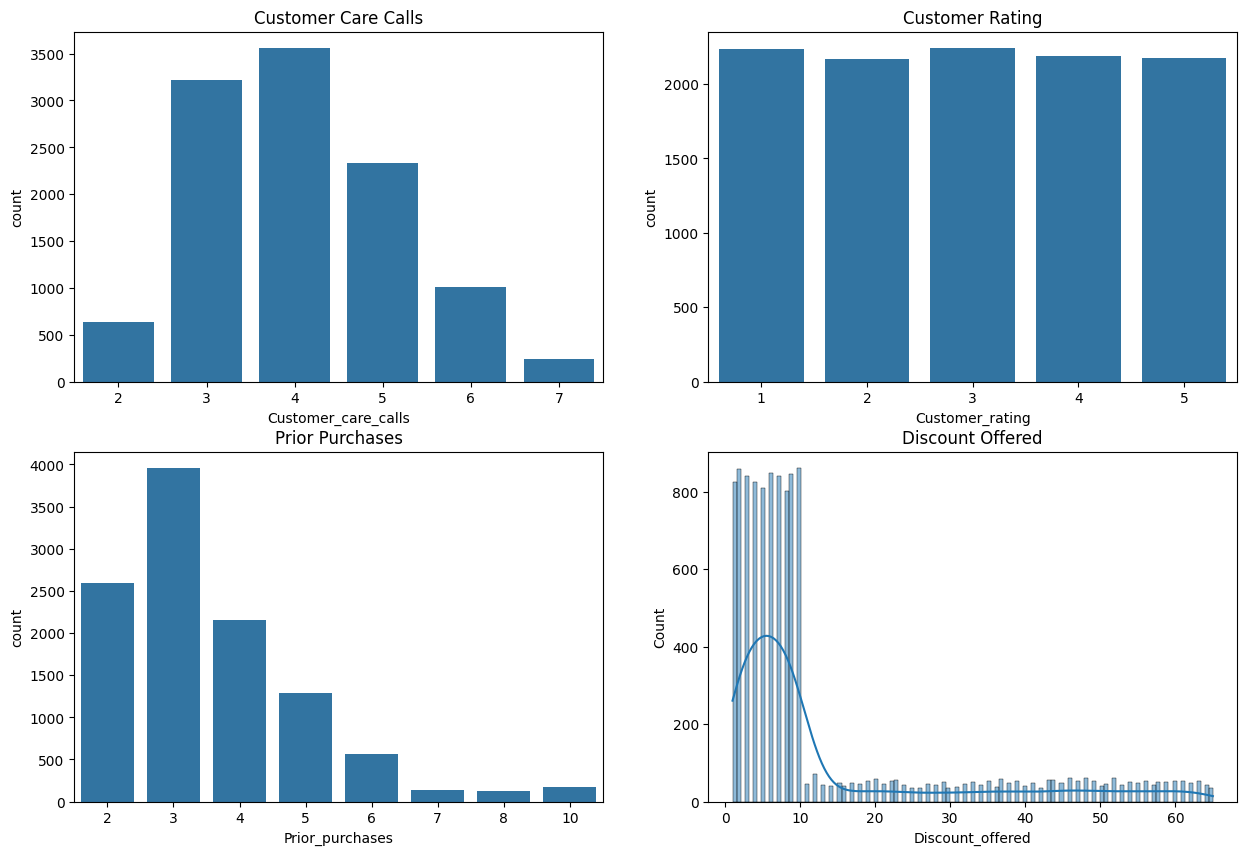

In [41]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

## Customer Gender and Product Delivery


Text(0.5, 1.0, 'Gender Vs Reached on Time')

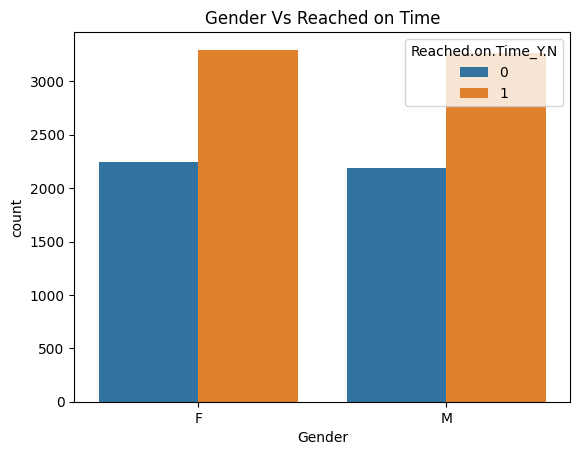

In [42]:
sns.countplot(x='Gender',data=df, hue='Reached.on.Time_Y.N').set_title('Gender Vs Reached on Time')

## Product Properties and Product Delivery


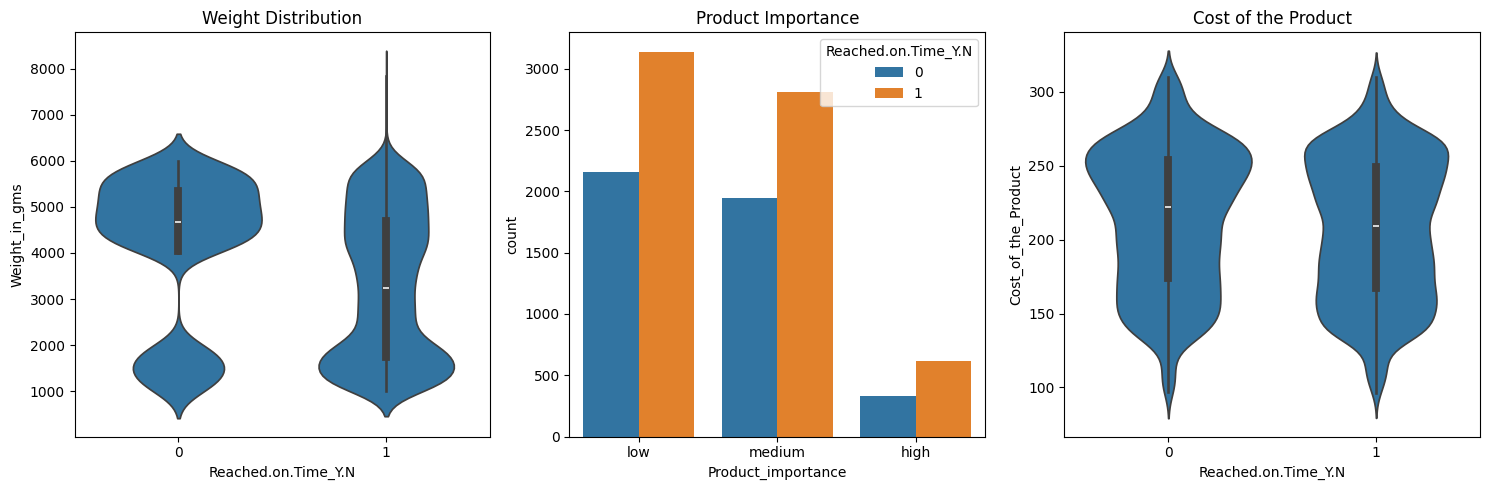

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(y=df['Weight_in_gms'], x=df['Reached.on.Time_Y.N'], ax=ax[0])
ax[0].set_title('Weight Distribution')

sns.countplot(x='Product_importance', data=df, ax=ax[1], hue='Reached.on.Time_Y.N')
ax[1].set_title('Product Importance')

sns.violinplot(y=df['Cost_of_the_Product'], x=df['Reached.on.Time_Y.N'], ax=ax[2])
ax[2].set_title('Cost of the Product')

plt.tight_layout()
plt.show()


## Logistics and Product Delivery

Text(0.5, 1.0, 'Mode of Shipment')

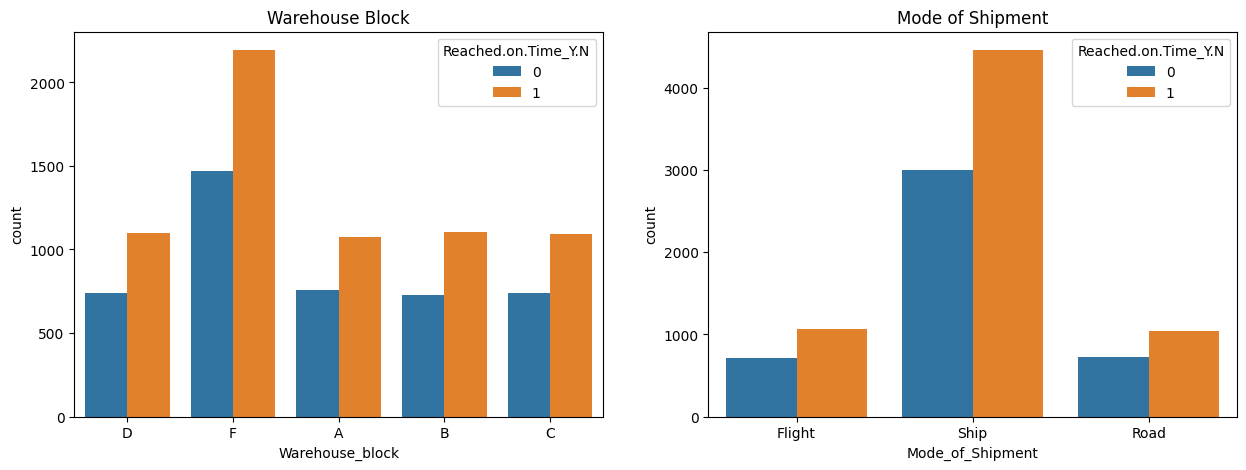

In [45]:
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Warehouse_block',data=df,ax=ax[0],hue='Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x='Mode_of_Shipment',data=df,ax=ax[1],hue='Reached.on.Time_Y.N').set_title('Mode of Shipment')


## Customer Experience and Product Delivery


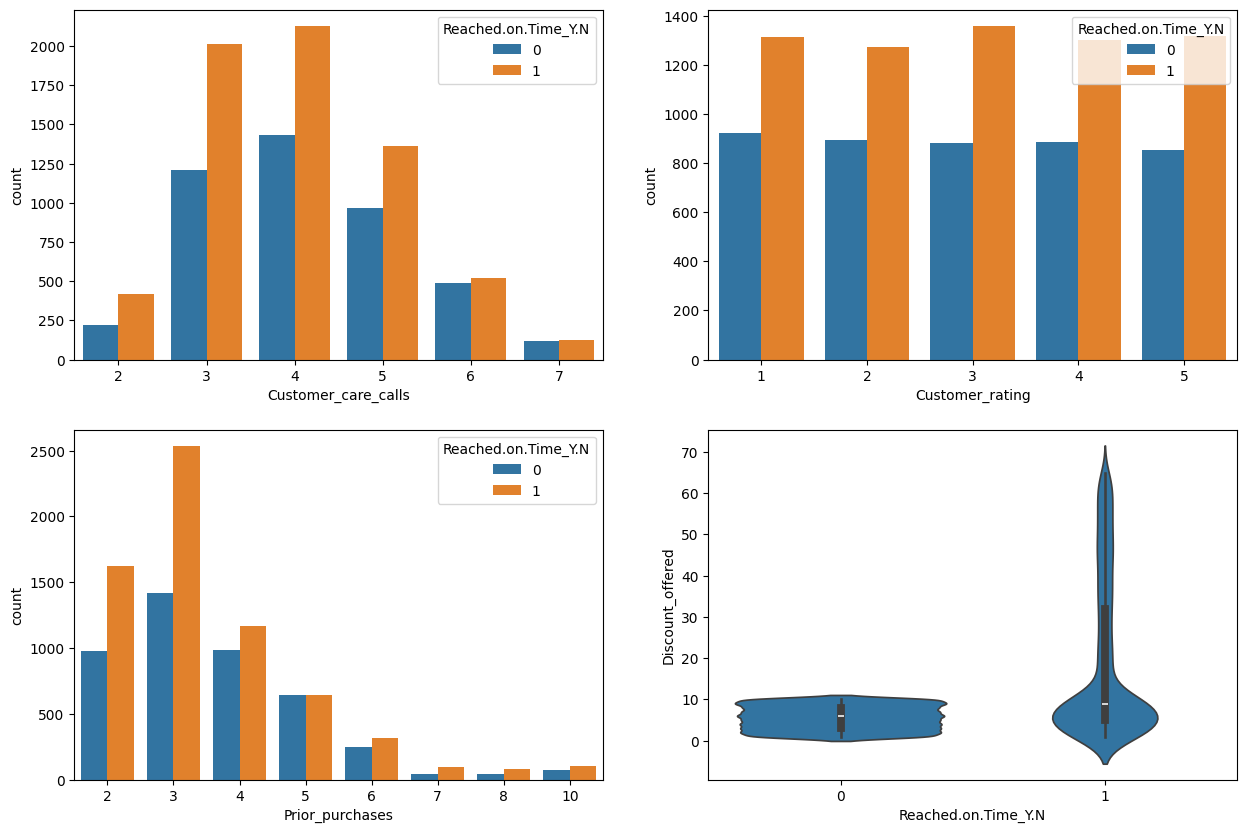

In [48]:
fig, ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(x='Customer_care_calls',data=df, ax=ax[0,0],hue='Reached.on.Time_Y.N').set_title=('Customer Care Calls')
sns.countplot(x='Customer_rating',data=df, ax=ax[0,1],hue='Reached.on.Time_Y.N').set_title=('Customer Rating')
sns.countplot(x='Prior_purchases',data=df, ax=ax[1,0],hue='Reached.on.Time_Y.N').set_title=('Prior Purchases')
sns.violinplot(x='Reached.on.Time_Y.N',y='Discount_offered',data=df, ax=ax[1,1]).set_title=('Discount Offered')


## Data Preprocessing 2

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


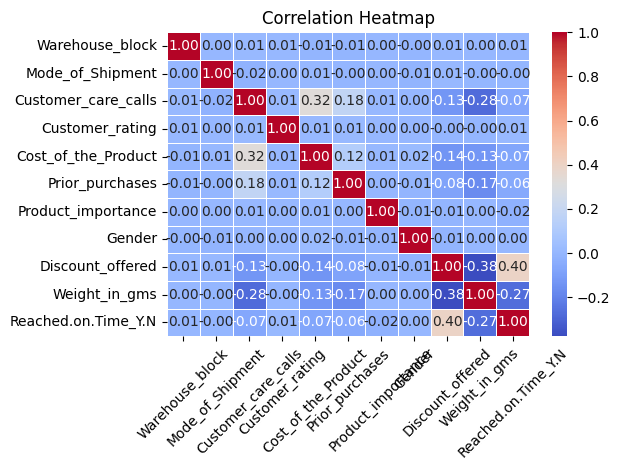

In [62]:
plt.Figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  
plt.yticks(rotation=0)   
plt.tight_layout()      
plt.show()

<Axes: xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

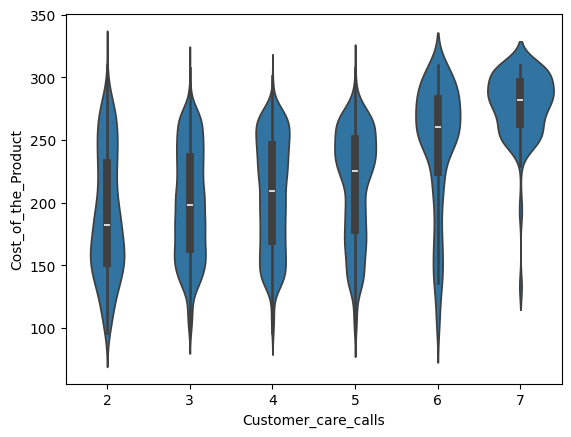

In [63]:
sns.violinplot(x='Customer_care_calls',y='Cost_of_the_Product',data=df)

## Train Test Split

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

## Model Building

Random Forest Classifier


In [66]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid= {
    'max_depth':[4,8,12,16],
    'min_samples_leaf':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'criterion':['gini','entropy'],
    'random_state':[0,42]
}

grid= GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs = -1, verbose=2, scoring='accuracy')

grid.fit(X_train,y_train)
print('Best Parameters:', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


In [70]:
rfc = RandomForestClassifier(criterion='gini',max_depth=8,min_samples_leaf=8,min_samples_split=2,random_state=2)
rfc.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [71]:
print('Training accuracy:',rfc.score(X_train,y_train))

Training accuracy: 0.7232640072735538


In [72]:
rfc_pred = rfc.predict(X_test)

Decision Tree Classifier


In [73]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'max_depth':[2,4,6,8],
    'min_samples_leaf':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'criterion':['gini','entropy'],
    'random_state':[0,42]
}

grid = GridSearchCV(estimator=dtc, param_grid=param_grid,cv =5, n_jobs=-1, verbose=2, scoring='accuracy')

grid.fit(X_train,y_train)
print('Best Parameters:',grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [75]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=6,min_samples_split=2,random_state=0,class_weight='balanced')
dtc.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [77]:
print('Training Accuracy',dtc.score(X_train,y_train))

Training Accuracy 0.6913285600636436


In [78]:
dtc_pred = dtc.predict(X_test)

Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()  
lr.fit(X_train, y_train)


c:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [83]:
lr.score(X_train,y_train)

0.6379133992499147

In [84]:
lr_pred = lr.predict(X_test)

K Nearest Neighbours

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [86]:
knn.score(X_train,y_train)


0.7782702579838618

In [87]:
knn_pred = knn.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error,r2_score

Text(0.5, 1.0, 'KNN Classifier')

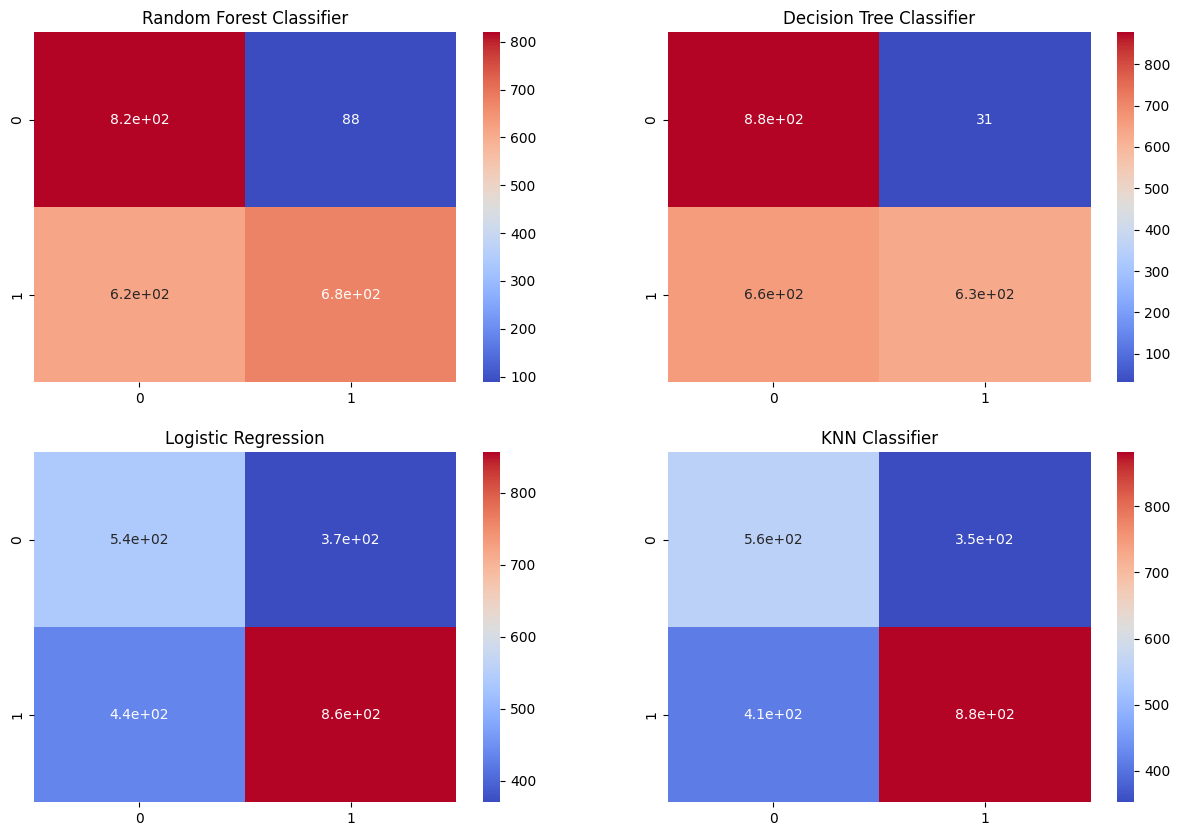

In [89]:
fig, ax= plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test,dtc_pred),annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')

In [90]:
print('Random Forest Classifier: \n', classification_report(y_test,rfc_pred))
print('Decision Tree Classifier : \n', classification_report(y_test,dtc_pred))
print('Logistic Regression: \n', classification_report(y_test,lr_pred))
print('KNN Classifier: \n', classification_report(y_test,knn_pred))


Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.90      0.70       908
           1       0.88      0.52      0.66      1292

    accuracy                           0.68      2200
   macro avg       0.73      0.71      0.68      2200
weighted avg       0.76      0.68      0.68      2200

Decision Tree Classifier : 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.65      1292

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.69      0.68      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.55      0.59      0.57       908
           1       0.70      0.66      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.63      0.63      0.63     

C:\Users\lsrin\AppData\Local\Temp\ipykernel_22400\3368117368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy,palette='magma').set_title('Model Comparision')


Text(0, 0.5, 'Accuracy')

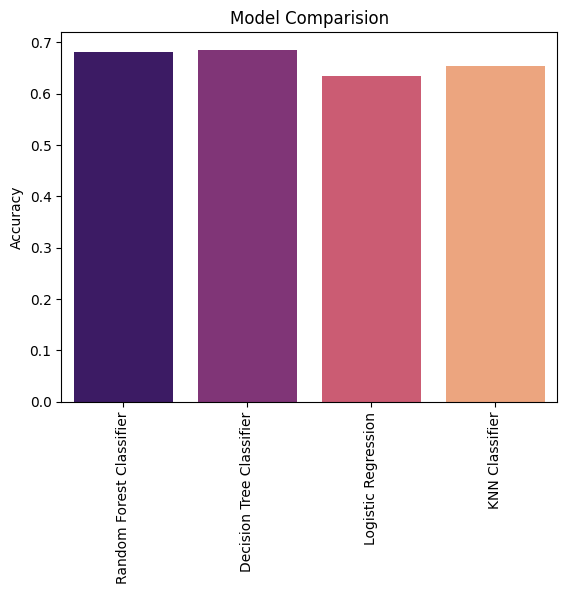

In [92]:
models = ['Random Forest Classifier','Decision Tree Classifier','Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test,rfc_pred),accuracy_score(y_test,dtc_pred),accuracy_score(y_test,lr_pred),accuracy_score(y_test,knn_pred)]
sns.barplot(x=models, y=accuracy,palette='magma').set_title('Model Comparision')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')